<a href="https://colab.research.google.com/github/saniyashk1542/ML_25-26/blob/main/binary_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [36]:
mnist=fetch_openml('mnist_784',version=1)

In [37]:
x=mnist.data
y=mnist.target.astype(int)

In [38]:
mask =(y==0)|( y==1)

In [39]:
x_binary=x[mask]
y_binary=y[mask]

In [40]:
x_train , x_test , y_train , y_test =train_test_split(x_binary , y_binary ,test_size=0.2 ,random_state=42)

In [41]:
x_train.shape

(11824, 784)

In [42]:
y_train.shape

(11824,)

In [43]:
x_test.shape

(2956, 784)

In [44]:
y_test.shape

(2956,)

In [45]:
print(y_binary.value_counts())


class
1    7877
0    6903
Name: count, dtype: int64


In [46]:
x_train=x_train/255.0
x_test=x_test/255.0

In [47]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred = model.predict(x_test)

In [50]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)

Accuracy: 0.9997
Confusion Matrix:
 [[1401    1]
 [   0 1554]]


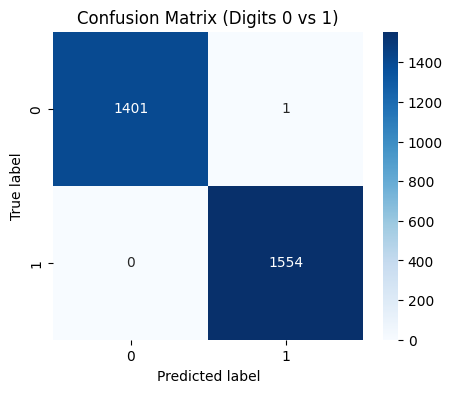

In [55]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix (Digits 0 vs 1)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()